<a href="https://colab.research.google.com/github/SHIVAM-MANDHAN/Sales-Analysis-of-ABC-Electronics-LTD./blob/main/SALES_ANALYSIS_OF_ABC_ELECTRONICS_LTD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SALES ANALYSIS OF ABC ELECTRONICS LTD.**

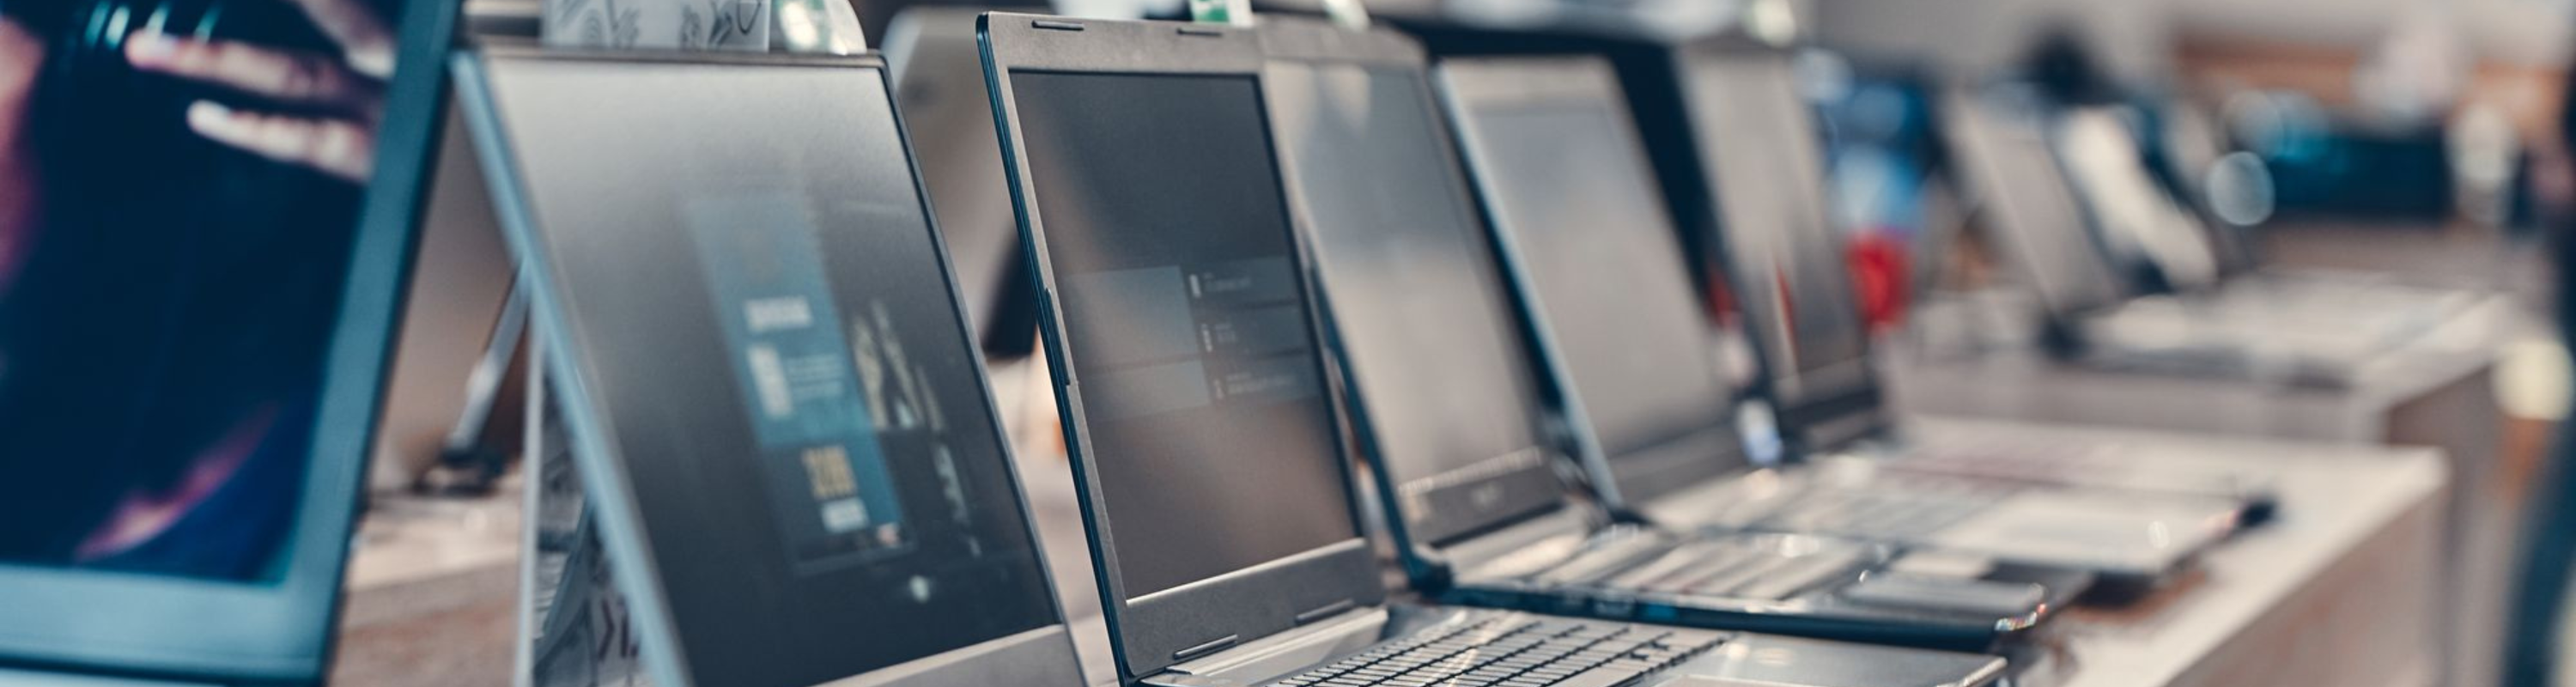

In [ ]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# Adding monthly data into dataframes

df1 = pd.read_csv("Sales_January_2019.csv")
df2 = pd.read_csv("Sales_February_2019.csv")
df3 = pd.read_csv("Sales_March_2019.csv")
df4 = pd.read_csv("Sales_April_2019.csv")
df5 = pd.read_csv("Sales_May_2019.csv")
df6 = pd.read_csv("Sales_June_2019.csv")
df7 = pd.read_csv("Sales_July_2019.csv")
df8 = pd.read_csv("Sales_August_2019.csv")
df9 = pd.read_csv("Sales_September_2019.csv")
df10 = pd.read_csv("Sales_October_2019.csv")
df11 = pd.read_csv("Sales_November_2019.csv")
df12 = pd.read_csv("Sales_December_2019.csv")

In [ ]:
#Checking January dataframe

df1.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
#Combining monthly dataframes to form an annual dataframe

df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

annual_df = pd.DataFrame()

for i in range(12):
  annual_df = annual_df.append(df_list[i], ignore_index = True)

In [ ]:
#Checking annual dataframe

annual_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [ ]:
#Checking NAN values

nan_df = annual_df[annual_df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Dropping NAN values

annual_df = annual_df.dropna(how="any")

nan_df = annual_df[annual_df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
#Renaming columns

annual_df.columns = ['order_id', 'product', 'quantity', 'unit_price', 'order_date', 'purchase_address']
annual_df.head()

,order_id,product,quantity,unit_price,order_date,purchase_address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
#Checking duplicate values

dupicate_df = annual_df[annual_df.duplicated()]
dupicate_df.head()

,order_id,product,quantity,unit_price,order_date,purchase_address
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
#Dropping duplicate values

annual_df = annual_df.drop_duplicates(keep=False)

dupicate_df = annual_df[annual_df.duplicated()]
dupicate_df.head()

,order_id,product,quantity,unit_price,order_date,purchase_address


In [ ]:
#Adding month column

annual_df["month"] = annual_df.order_date.str[0:2]
annual_df.head()

,order_id,product,quantity,unit_price,order_date,purchase_address,month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [ ]:
#Checking data type of columns

annual_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185422 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          185422 non-null  object
 1   product           185422 non-null  object
 2   quantity          185422 non-null  object
 3   unit_price        185422 non-null  object
 4   order_date        185422 non-null  object
 5   purchase_address  185422 non-null  object
 6   month             185422 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


In [ ]:
#Converting string values into integer

annual_df.month = pd.to_numeric(annual_df.month)
annual_df.quantity = pd.to_numeric(annual_df.quantity)
annual_df.unit_price = pd.to_numeric(annual_df.unit_price)

annual_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185422 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          185422 non-null  object 
 1   product           185422 non-null  object 
 2   quantity          185422 non-null  int64  
 3   unit_price        185422 non-null  float64
 4   order_date        185422 non-null  object 
 5   purchase_address  185422 non-null  object 
 6   month             185422 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 11.3+ MB


# **What was the best month for sales?**

In [ ]:
#Adding sales column

annual_df["sales"] = annual_df.quantity*annual_df.unit_price
annual_df.head()

,order_id,product,quantity,unit_price,order_date,purchase_address,month,sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [ ]:
#Grouping by month

sales_df = annual_df.groupby("month", as_index = False).sum()
sales_df.head()

,month,quantity,unit_price,sales
0,1,10883,1810081.24,1820569.59
1,2,13413,2184996.04,2198133.74
2,3,16953,2786961.45,2802846.32
3,4,20514,3364766.50,3387765.72
4,5,18639,3131144.09,3148625.71


In [ ]:
#Plotting sales vs month

v_bar = px.bar(
        x = sales_df.month,
        y = sales_df.sales,
        color = sales_df.sales,
        color_continuous_scale='blugrn',
        title='Sales vs Month')

v_bar.update_layout(xaxis_title='Month Number', 
                    coloraxis_showscale=False,
                    yaxis_title='Total Sales ($)')
v_bar.show()

*   December was the best month for sales
*   The sales in december was 4.6 million $
*   Festive season in december might be the reason for high number of sales

# **Which city had the highest number of sales?**

In [ ]:
#Adding a city column

add = annual_df.purchase_address.str.split(",", expand = True)
col = ["house_no", "city", "state"]
add.columns = col

annual_df["city"] = add["city"]
annual_df.head()

,order_id,product,quantity,unit_price,order_date,purchase_address,month,sales,city
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin


In [ ]:
#Grouping by city

city_df = annual_df.groupby("city", as_index = False).sum()
city_df.head()

,city,quantity,unit_price,month,sales
0,Atlanta,16566,2777309.18,104504,2792899.56
1,Austin,11121,1806806.45,69611,1816506.91
2,Boston,22460,3631387.03,140684,3655613.29
3,Dallas,16684,2747424.94,104274,2762772.52
4,Los Angeles,33205,5412908.17,207715,5444037.76


In [ ]:
#Plotting sales vs city

v_bar = px.bar(
        x = city_df.city,
        y = city_df.sales,
        color = city_df.sales,
        color_continuous_scale='blugrn',
        title='Sales vs City')

v_bar.update_layout(xaxis_title='City', 
                    coloraxis_showscale=False,
                    yaxis_title='Total Sales ($)')
v_bar.show()

*   San Francisco had the highest number for sales
*   The sales in San Francisco was 8.3 million $
*   The presence of large number of tech companies in San Francisco might be the reason for high sales

# **At what hour maximum sales were made?**

In [ ]:
#Converting order_date values into datetime object

annual_df.order_date = pd.to_datetime(annual_df.order_date)
annual_df["hour"] = annual_df.order_date.dt.hour
annual_df.head()

,order_id,product,quantity,unit_price,order_date,purchase_address,month,sales,city,hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin,11


In [ ]:
#Grouping by hour

hour_df = annual_df.groupby("hour", as_index = False).sum()
hour_df.head()

,hour,quantity,unit_price,month,sales
0,0,4412,708951.48,27400,713376.05
1,1,2613,457884.04,16629,460260.92
2,2,1396,233809.66,8497,234827.46
3,3,926,144696.52,5902,145727.99
4,4,933,161828.30,6122,162431.13


In [ ]:
#Plotting sales vs hour

v_bar = px.line(
        x = hour_df.hour,
        y = hour_df.sales,
        title='Sales vs Hour')

v_bar.update_layout(xaxis_title='Hour', 
                    coloraxis_showscale=False,
                    yaxis_title='Total Sales ($)')

v_bar.update_traces(line_color='green', line_width = 3)

v_bar.show()

*   7-8 in evening was the best time for sales
*   The total annual sales between 7-8 in evening was 2.4 million $
*   The reason for high sales might be off work hour
*   The other best hours were 11-12 & 12-1 in noon

# **Which products had the highest number of sales?**

In [ ]:
#Groping data by product

product_sales = annual_df.groupby("product", as_index = False).sum()
product_sales = product_sales.sort_values("sales", ascending = False)[:10]
product_sales.head()

,product,quantity,unit_price,month,sales,hour
13,Macbook Pro Laptop,4722,8020600.00,33504,8027400.00,68189
18,iPhone,6845,4786600.00,47925,4791500.00,98577
14,ThinkPad Laptop,4126,4123958.76,28902,4125958.74,59680
9,Google Phone,5526,3311400.00,38267,3315600.00,79397
1,27in 4K Gaming Monitor,6234,2425737.80,44352,2431197.66,90766


In [ ]:
#Plotting sales vs product

v_bar = px.bar(
        x = product_sales["product"][:5],
        y = product_sales["sales"][:5],
        color = product_sales["sales"][:5],
        color_continuous_scale='blugrn',
        title='Sales vs Product')

v_bar.update_layout(xaxis_title='Product', 
                    coloraxis_showscale=False,
                    yaxis_title='Total Sales ($)')
v_bar.show()

*   Macbook Pro Laptop had the highest number of sales
*   The total annual sales of Macbook Pro Laptop was 8 million $
*   The reason for high sales might be popularity & high price of Macbook Pro

# **Which products had maximum purchases?**

In [ ]:
#Groping data by product

product_purchases = annual_df.groupby("product", as_index = False).sum()
product_purchases = product_sales.sort_values("quantity", ascending = False)[:10]
product_purchases.head()

,product,quantity,unit_price,month,sales,hour
6,Apple Airpods Headphones,15613,2325150.00,109131,2341950.00,222572
7,Bose SoundSport Headphones,13403,1326967.29,93723,1340165.97,191709
2,27in FHD Monitor,7532,1123275.11,52410,1129724.68,107304
18,iPhone,6845,4786600.00,47925,4791500.00,98577
1,27in 4K Gaming Monitor,6234,2425737.80,44352,2431197.66,90766


In [ ]:
#Plotting Total Purchases vs product

v_bar = px.bar(
        x = product_purchases["product"][:5],
        y = product_purchases["quantity"][:5],
        color = product_purchases["quantity"][:5],
        color_continuous_scale='blugrn',
        title='Purchases vs Product')

v_bar.update_layout(xaxis_title='Product', 
                    coloraxis_showscale=False,
                    yaxis_title='Total Purchases')
v_bar.show()

*   Apple Airpods Headphones had the highest number of purchases
*   The total purchase of Apple Airpods Headphones was 15,661
*   The reason for large number of purchases of Apple Airpods might be high popularity & demand

# **Which products are most often sold together?**

In [ ]:
#Getting products with same order_id 

combination_df = annual_df[annual_df.order_id.duplicated(keep=False)]
combination_df["sold_together"] = combination_df.groupby("order_id")["product"].transform(lambda x: ",".join(x))
combination_df = combination_df.drop_duplicates(subset=['order_id'], keep = "first")
combination_df.head()

<ipython-input-34-4904ae4b33f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combination_df["sold_together"] = combination_df.groupby("order_id")["product"].transform(lambda x: ",".join(x))


,order_id,product,quantity,unit_price,order_date,purchase_address,month,sales,city,hour,sold_together
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,11.95,Austin,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,150.00,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,400.00,New York City,11,"Vareebadd Phone,Wired Headphones"
153,141384,Google Phone,1,600.00,2019-01-03 00:14:00,"223 Jackson St, Boston, MA 02215",1,600.00,Boston,0,"Google Phone,USB-C Charging Cable"
220,141450,Google Phone,1,600.00,2019-01-12 11:16:00,"521 Park St, San Francisco, CA 94016",1,600.00,San Francisco,11,"Google Phone,Bose SoundSport Headphones"


In [ ]:
#Counting total puchases for product which were sold together

sold_together_list = [i for i in combination_df.sold_together]

unique_sold_together = []
for i in sold_together_list:
  if i not in unique_sold_together:
    unique_sold_together.append(i)

freq_list =[]

for i in unique_sold_together:
  freq = sold_together_list.count(i)
  freq_list.append(freq)

In [ ]:
#Making dataframe for products combinations & total purchases 

sold_together_df = pd.DataFrame()
sold_together_df["sold_together"] = unique_sold_together
sold_together_df["purchases"] = freq_list
freq_df = sold_together_df.sort_values("purchases", ascending = False)
freq_df.head()

,sold_together,purchases
10,"iPhone,Lightning Charging Cable",882
3,"Google Phone,USB-C Charging Cable",857
12,"iPhone,Wired Headphones",361
23,"Vareebadd Phone,USB-C Charging Cable",312
17,"Google Phone,Wired Headphones",304


In [ ]:
#Plotting Purchases vs Product Combination

v_bar = px.bar(
        x = freq_df.sold_together[:5],
        y = freq_df.purchases[:5],
        color = freq_df.purchases[:5],
        color_continuous_scale='blugrn',
        title='Purchases vs Product Combinations')

v_bar.update_layout(xaxis_title='Product Combinations', 
                    coloraxis_showscale=False,
                    yaxis_title='Total Purchases')
v_bar.show()

*   iPhone & lightning charging cable were sold together the most
*   The total purchase of iPhone with lightning charging were 882
*   The reason for large number of purchases is the iPhone's popularity & the unavailability of the charging cable that comes with the iPhone